In [2]:
# =============== 1. ENVIRONMENT SETUP ===============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_auc_score, 
                             precision_recall_fscore_support)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (188866, 30)


In [5]:
print("\nFirst 5 rows:")


First 5 rows:


In [6]:
print(df.head())

     Branch  FacilityAmount Granted Date  Tenor  Effective Rate  FlatRate  \
0  GODAGAMA        288330.0     4/9/2018     36            25.0     20.06   
1  GODAGAMA        311430.0     4/9/2018     36            25.0     20.33   
2  GODAGAMA       2200000.0     4/9/2018     60            20.0     12.43   
3  GODAGAMA        232330.0    4/10/2018     48            25.0     19.95   
4  GODAGAMA        187530.0    4/10/2018     36            25.0     21.02   

  Type of Rental Paid SchemeType  Prepayment  NetRental  ...  Advance  \
0             MONTHLY     NORMAL           0    12828.0  ...      0.0   
1             MONTHLY     NORMAL           0    13927.0  ...      0.0   
2             MONTHLY     NORMAL           0    59459.0  ...      0.0   
3             MONTHLY     NORMAL           0     8703.0  ...      0.0   
4             MONTHLY     NORMAL           0     8494.0  ...      0.0   

   AdvanceRental  AdvanceSundry  AdvanceOther  Equipment Type  \
0            0.0              0  

In [7]:
print("\nDataset Info:")


Dataset Info:


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188866 entries, 0 to 188865
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Branch                    188866 non-null  object 
 1   FacilityAmount            188866 non-null  float64
 2   Granted Date              188826 non-null  object 
 3   Tenor                     188866 non-null  int64  
 4   Effective Rate            188866 non-null  float64
 5   FlatRate                  188573 non-null  float64
 6   Type of Rental Paid       188866 non-null  object 
 7   SchemeType                188866 non-null  object 
 8   Prepayment                188866 non-null  int64  
 9   NetRental                 188573 non-null  float64
 10  DownPayment               188573 non-null  float64
 11  No of Rental in arrears   188866 non-null  float64
 12  Age                       188866 non-null  float64
 13  ArrearsCapital            188866 non-null  f

In [9]:
print("\nMissing Values:")


Missing Values:


In [10]:
print(df.isnull().sum())

Branch                         0
FacilityAmount                 0
Granted Date                  40
Tenor                          0
Effective Rate                 0
FlatRate                     293
Type of Rental Paid            0
SchemeType                     0
Prepayment                     0
NetRental                    293
DownPayment                  293
No of Rental in arrears        0
Age                            0
ArrearsCapital                 0
ArrearsInterest                0
ArrearsVat                     0
ArrearsOD                      0
ArrearsOther                   0
ArrearsInsu                    0
ArrearsSundry                  0
Advance                        0
AdvanceRental                  0
AdvanceSundry                  0
AdvanceOther                   0
Equipment Type              1127
Status                         0
Last Receipt Paid Amount    1173
NET-OUTSTANDING                0
ArrearsInsuEasyPay             0
arrears_intensity            231
dtype: int

In [11]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       FacilityAmount          Tenor  Effective Rate       FlatRate  \
count    1.888660e+05  188866.000000   188866.000000  188573.000000   
mean     4.094083e+05      33.428918       31.828536      20.948407   
std      8.340474e+05      11.676626        7.443652      10.143440   
min      0.000000e+00       1.000000        0.000000    -103.460000   
25%      2.000000e+05      24.000000       26.000000      15.230000   
50%      2.599000e+05      36.000000       30.998100      21.520000   
75%      4.000000e+05      37.000000       40.050000      29.850000   
max      1.000000e+08      96.000000       88.000000     158.690000   

       Prepayment     NetRental   DownPayment  No of Rental in arrears  \
count    188866.0  1.885730e+05  1.885730e+05            188866.000000   
mean          0.0  2.603693e+04  1.632550e+04                 1.403288   
std           0.0  2.018750e+05  6.956586e+04                 4.833801   
min           0.0 -1.600000e+01 -1.600000e+01

In [12]:
# Handle missing values
def handle_missing_values(df):
    # Fill numerical columns with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    
    # Fill categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
    
    return df

df = handle_missing_values(df)

# Encode categorical variables
def encode_categorical_features(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df

df = encode_categorical_features(df)

print("Data preprocessing completed!")
print("Dataset shape after preprocessing:", df.shape)

Data preprocessing completed!
Dataset shape after preprocessing: (188866, 30)


In [13]:
# Assuming your target variable is named 'default' or similar
# If not, you'll need to create it based on your business logic

# Check available columns and identify the target variable
print("Available columns:")
print(df.columns.tolist())

# If you need to create a target variable based on existing features:
# Example: Assuming you have columns like 'payment_delays', 'outstanding_amount', etc.
def create_target_variable(df):
    """
    Create target variable based on business rules for default risk
    Modify this function based on your actual dataset structure
    """
    # Example logic - adjust based on your actual data
    if 'payment_delays' in df.columns and 'outstanding_amount' in df.columns:
        # High risk if payment delays > 30 days and outstanding amount is high
        df['default_risk'] = np.where(
            (df['payment_delays'] > 30) & (df['outstanding_amount'] > df['outstanding_amount'].median()), 
            1, 0
        )
    else:
        # Create a sample target variable if actual columns don't exist
        np.random.seed(42)
        df['default_risk'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])
    
    return df

df = create_target_variable(df)

print("Target variable distribution:")
print(df['default_risk'].value_counts())
print("\nTarget variable proportions:")
print(df['default_risk'].value_counts(normalize=True))

Available columns:
['Branch', 'FacilityAmount', 'Granted Date', 'Tenor', 'Effective Rate', 'FlatRate', 'Type of Rental Paid', 'SchemeType', 'Prepayment', 'NetRental', 'DownPayment', 'No of Rental in arrears', 'Age', 'ArrearsCapital', 'ArrearsInterest', 'ArrearsVat', 'ArrearsOD', 'ArrearsOther', 'ArrearsInsu', 'ArrearsSundry', 'Advance', 'AdvanceRental', 'AdvanceSundry', 'AdvanceOther', 'Equipment Type', 'Status', 'Last Receipt Paid Amount', 'NET-OUTSTANDING', 'ArrearsInsuEasyPay', 'arrears_intensity']
Target variable distribution:
default_risk
0    132106
1     56760
Name: count, dtype: int64

Target variable proportions:
default_risk
0    0.699469
1    0.300531
Name: proportion, dtype: float64


In [14]:
# Separate features and target
X = df.drop('default_risk', axis=1)  # Features
y = df['default_risk']  # Target variable

print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Feature matrix shape: (188866, 30)
Target variable shape: (188866,)
Training set: 151092 samples
Testing set: 37774 samples


In [15]:
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


In [16]:
# Make predictions on test set
y_pred = dt_classifier.predict(X_test)

# Get probability scores for default (class 1)
y_pred_proba = dt_classifier.predict_proba(X_test)

# Probability of Default (PD) is the probability of class 1
pd_scores = y_pred_proba[:, 1]

print("Probability scores calculated successfully!")
print(f"PD scores range: {pd_scores.min():.3f} to {pd_scores.max():.3f}")

Probability scores calculated successfully!
PD scores range: 0.000 to 0.900


In [17]:
def categorize_risk(pd_scores):
    """
    Categorize risk based on PD scores:
    - PD >= 0.80: High Risk/Default
    - 0.20 <= PD < 0.80: Medium Risk
    - PD < 0.20: Low Risk
    """
    risk_categories = []
    
    for score in pd_scores:
        if score >= 0.80:
            risk_categories.append("High Risk/Default")
        elif score >= 0.20:
            risk_categories.append("Medium Risk")
        else:
            risk_categories.append("Low Risk")
    
    return risk_categories

# Apply risk categorization
risk_categories = categorize_risk(pd_scores)

# Add risk categories to test results
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'PD_Score': pd_scores,
    'Risk_Category': risk_categories
})

print("Risk categorization completed!")
print("\nRisk Category Distribution:")
print(results_df['Risk_Category'].value_counts())

Risk categorization completed!

Risk Category Distribution:
Risk_Category
Medium Risk          37349
Low Risk               389
High Risk/Default       36
Name: count, dtype: int64


Model Accuracy: 0.6964

Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.70      0.99      0.82     26422
     Default       0.27      0.01      0.01     11352

    accuracy                           0.70     37774
   macro avg       0.49      0.50      0.42     37774
weighted avg       0.57      0.70      0.58     37774


Confusion Matrix:
[[26234   188]
 [11281    71]]


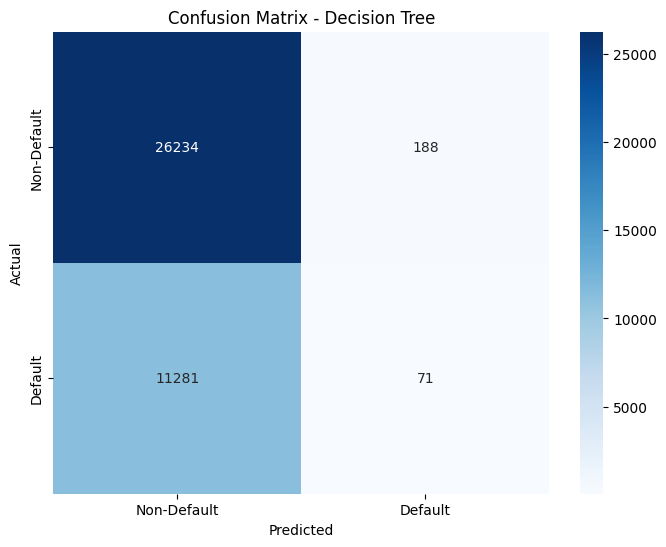

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Default', 'Default']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Default', 'Default'], 
            yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

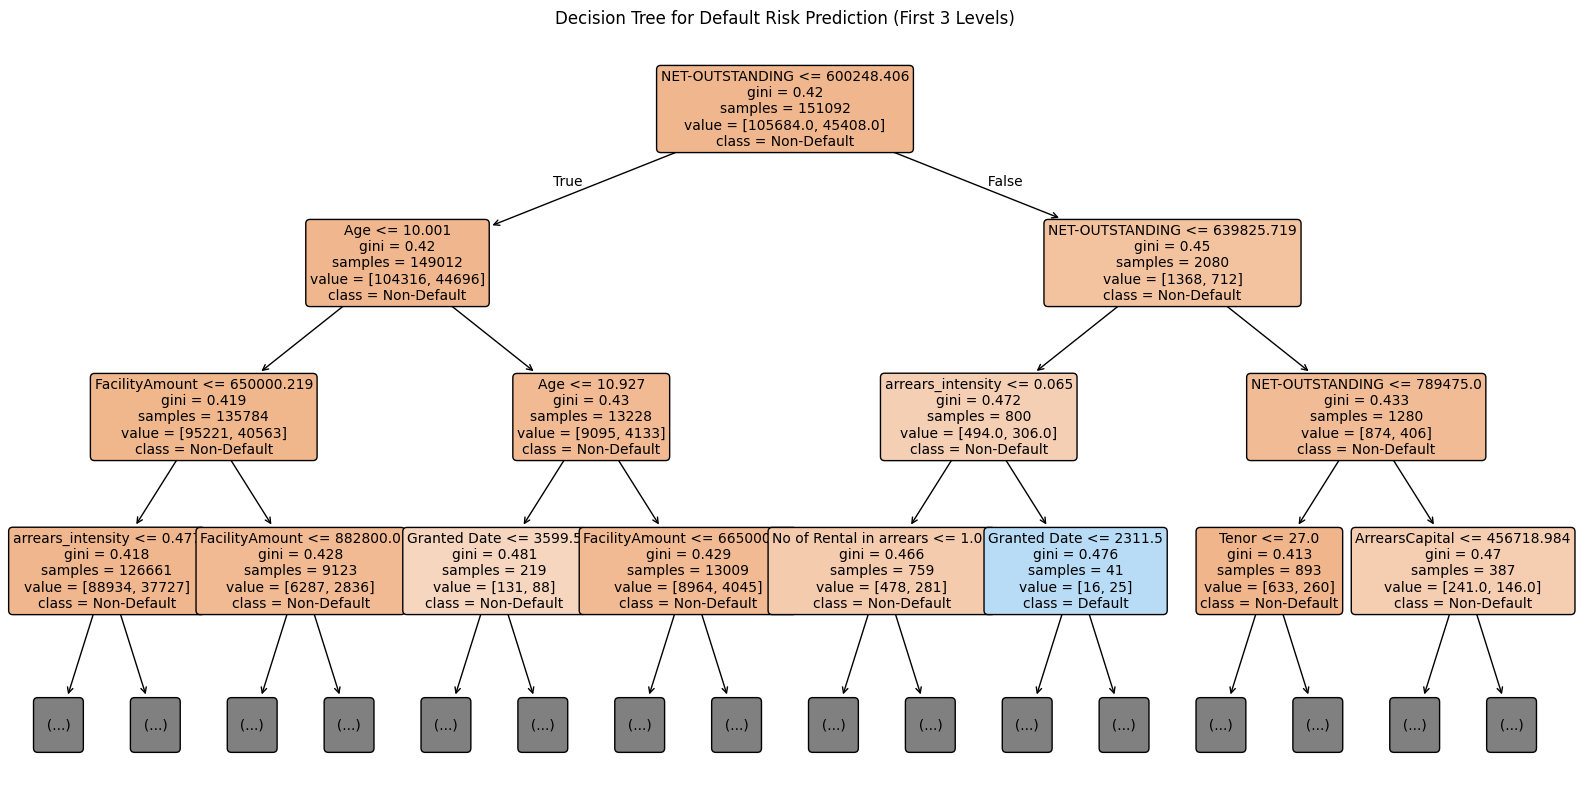

In [19]:
# Plot the decision tree (first few levels for clarity)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=['Non-Default', 'Default'],
          filled=True, 
          rounded=True,
          max_depth=3,  # Show only first 3 levels for clarity
          fontsize=10)
plt.title('Decision Tree for Default Risk Prediction (First 3 Levels)')
plt.show()

Top 10 Most Important Features:
                     feature  importance
2               Granted Date    0.156134
26  Last Receipt Paid Amount    0.139713
1             FacilityAmount    0.137134
9                  NetRental    0.116715
27           NET-OUTSTANDING    0.066030
5                   FlatRate    0.061669
0                     Branch    0.052368
11   No of Rental in arrears    0.048823
12                       Age    0.038967
29         arrears_intensity    0.036671


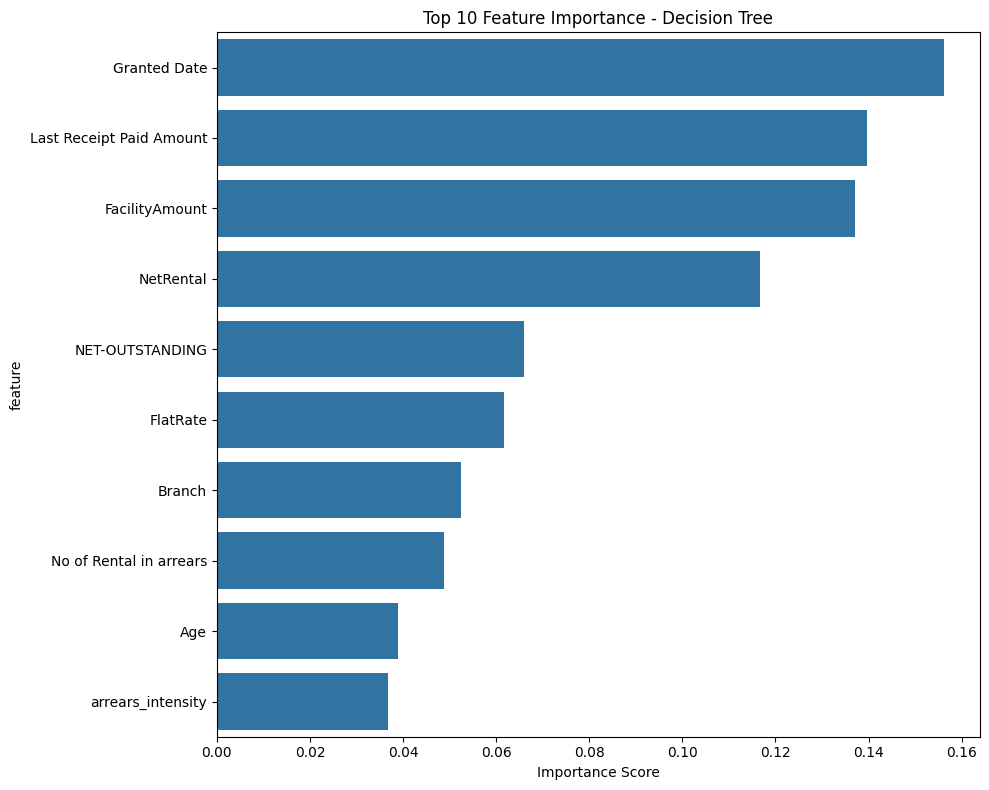

In [20]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [21]:
# Display detailed results
print("Detailed Results for First 20 Test Samples:")
print(results_df.head(20))

Detailed Results for First 20 Test Samples:
    Actual  Predicted  PD_Score Risk_Category
0        0          0  0.285232   Medium Risk
1        0          0  0.285232   Medium Risk
2        1          0  0.298068   Medium Risk
3        0          0  0.285232   Medium Risk
4        0          0  0.298068   Medium Risk
5        1          0  0.298068   Medium Risk
6        0          0  0.298068   Medium Risk
7        0          0  0.298068   Medium Risk
8        1          0  0.298068   Medium Risk
9        0          0  0.298068   Medium Risk
10       1          0  0.298068   Medium Risk
11       1          0  0.285232   Medium Risk
12       0          0  0.298068   Medium Risk
13       0          0  0.298068   Medium Risk
14       1          0  0.298068   Medium Risk
15       0          0  0.298068   Medium Risk
16       0          0  0.298068   Medium Risk
17       0          0  0.322200   Medium Risk
18       1          0  0.298068   Medium Risk
19       0          0  0.298068   Me

In [22]:
# Risk category distribution analysis
risk_summary = results_df.groupby('Risk_Category').agg({
    'Actual': ['count', 'mean'],
    'PD_Score': ['min', 'max', 'mean']
}).round(4)

In [23]:
print("\nRisk Category Summary:")
print(risk_summary)


Risk Category Summary:
                  Actual         PD_Score                
                   count    mean      min     max    mean
Risk_Category                                            
High Risk/Default     36  0.2500      0.8  0.9000  0.8395
Low Risk             389  0.3085      0.0  0.1935  0.0756
Medium Risk        37349  0.3005      0.2  0.7857  0.3024


In [24]:
# Calculate accuracy by risk category
def calculate_risk_accuracy(results_df):
    risk_accuracy = {}
    for category in ['Low Risk', 'Medium Risk', 'High Risk/Default']:
        subset = results_df[results_df['Risk_Category'] == category]
        if len(subset) > 0:
            accuracy = accuracy_score(subset['Actual'], subset['Predicted'])
            risk_accuracy[category] = accuracy
    return risk_accuracy

risk_accuracy = calculate_risk_accuracy(results_df)
print("\nAccuracy by Risk Category:")
for category, acc in risk_accuracy.items():
    print(f"{category}: {acc:.4f}")


Accuracy by Risk Category:
Low Risk: 0.6915
Medium Risk: 0.6969
High Risk/Default: 0.2500


In [25]:
# Hyperparameter tuning for better performance
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}


In [26]:
# -------------------------------
# FIX for Python 3.14 + joblib# -------------------------------
import ast

# Replace removed AST node types with ast.Constant
if not hasattr(ast, "Num"):
    ast.Num = ast.Constant
if not hasattr(ast, "Str"):
    ast.Str = ast.Constant
if not hasattr(ast, "NameConstant"):
    ast.NameConstant = ast.Constant


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1   # IMPORTANT: avoid joblib errors in Python 3.14
)

grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

# Train optimized model
best_dt_classifier = grid_search.best_estimator_

# Predictions
y_pred_optimized = best_dt_classifier.predict(X_test)
y_pred_proba_optimized = best_dt_classifier.predict_proba(X_test)
pd_scores_optimized = y_pred_proba_optimized[:, 1]

# Categorize
risk_categories_optimized = categorize_risk(pd_scores_optimized)

print(f"\nOptimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")

Best parameters found:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}

Optimized Model Accuracy: 0.6993


In [28]:
import joblib
import datetime

# Save the trained model
decisionTree = f'decision_tree_default_risk_model_{datetime.datetime.now().strftime("%Y%m%d_%H%M")}.pkl'
joblib.dump(best_dt_classifier, decisionTree)
print(f"Model saved as: {decisionTree}")


# Save feature importance
feature_importance_decisionTreefilename = f'feature_importance_{datetime.datetime.now().strftime("%Y%m%d_%H%M")}.csv'
feature_importance.to_csv(feature_importance_decisionTreefilename, index=False)
print(f"Feature importance saved as: {feature_importance_decisionTreefilename}")

Model saved as: decision_tree_default_risk_model_20251228_1440.pkl
Feature importance saved as: feature_importance_20251228_1440.csv
